In [6]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import skimage.color as skc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import lab2rgb
import sys

In [7]:
# representative RGB colours for each label, for nice display
COLOUR_RGB = {
    'red': (255, 0, 0),
    'orange': (255, 114, 0),
    'yellow': (255, 255, 0),
    'green': (0, 230, 0),
    'blue': (0, 0, 255),
    'purple': (187, 0, 187),
    'brown': (117, 60, 0),
    'pink': (255, 187, 187),
    'black': (0, 0, 0),
    'grey': (150, 150, 150),
    'white': (255, 255, 255),
}
name_to_rgb = np.vectorize(COLOUR_RGB.get, otypes=[np.uint8, np.uint8, np.uint8])




In [8]:
def plot_predictions(model, lum=71, resolution=256):
    """
    Create a slice of LAB colour space with given luminance; predict with the model; plot the results.
    """
    wid = resolution
    hei = resolution
    n_ticks = 5

    # create a hei*wid grid of LAB colour values, with L=lum
    ag = np.linspace(-100, 100, wid)
    bg = np.linspace(-100, 100, hei)
    aa, bb = np.meshgrid(ag, bg)
    ll = lum * np.ones((hei, wid))
    lab_grid = np.stack([ll, aa, bb], axis=2)

    # convert to RGB for consistency with original input
    X_grid = lab2rgb(lab_grid)

    # predict and convert predictions to colours so we can see what's happening
    y_grid = model.predict(X_grid.reshape((wid*hei, 3)))
    pixels = np.stack(name_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot input and predictions
    plt.figure(figsize=(10, 5))
    plt.suptitle('Predictions at L=%g' % (lum,))
    plt.subplot(1, 2, 1)
    plt.title('Inputs')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.ylabel('B')
    plt.imshow(X_grid.reshape((hei, wid, 3)))

    plt.subplot(1, 2, 2)
    plt.title('Predicted Labels')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.imshow(pixels)


[[168 211 243 'blue' 'good']
 [37 32 40 'black' 'perfect']
 [35 34 38 'black' 'perfect']
 ...
 [26 166 196 'blue' 'good']
 [7 127 57 'green' 'perfect']
 [118 146 30 'green' 'poor']]


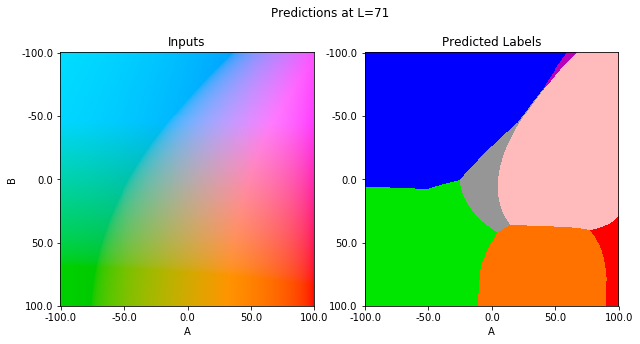

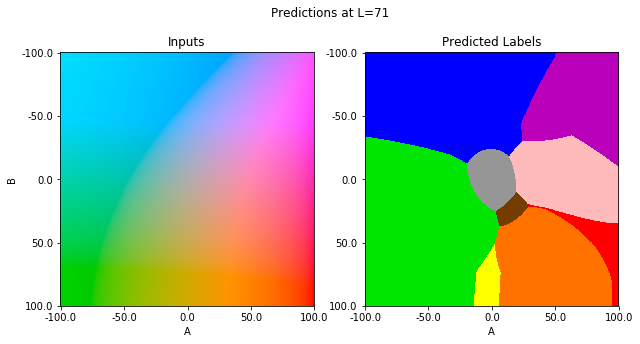

In [12]:

def rgb_to_leg_converter(rgb_color):
    import skimage.color as skc
    r1 = rgb_color.reshape((-1, 1, 3))
    lab_colours = skc.rgb2lab(r1)
    return lab_colours.reshape(-1, 3)

def main():
    sys.argv[1] = "colour-data.csv"
    data = pd.read_csv(sys.argv[1])
    data[['R','G','B']]
    X = data[['R', 'G', 'B']].values / 255
    y = data['Label'].values
    print (data.values)
    #return

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # TODO: build model_rgb to predict y from X.
    # TODO: print model_rgb's accuracy_score
    bayes_rgb_model = GaussianNB()
    
    bayes_rgb_model.fit(X_train, y_train)
    
    plot_predictions(bayes_rgb_model)
    plt.savefig('predictions_rgb.png')
    


    # TODO: build model_lab to predict y from X by converting to LAB colour first.
    # TODO: print model_lab's accuracy_score

    pipeline = make_pipeline(
        FunctionTransformer(rgb_to_leg_converter), 
        GaussianNB(priors=None))
    
    model_lab = pipeline.fit(X, y)


    plot_predictions(model_lab)
    plt.savefig('predictions_lab.png')


if __name__ == '__main__':
    main()
